In [2]:
from google.colab import files
uploaded = files.upload()    #Upload healthcare_capstone.csv

Saving patients_table.csv to patients_table.csv
Saving healthcare_capstone.csv to healthcare_capstone.csv


In [36]:
import pandas as pd
df = pd.read_csv('healthcare_capstone.csv')
df.head()

,visit_id,patient_id,visit_date,age,gender,city,insurance,dept,diag_code,diag_desc,procedure,length_of_stay,cost,blood_sugar,creatinine,readmitted_30d,no_show,outcome
0,1,350,2023-03-25,41,Male,Mumbai,Private,ENT,I25,Ischemic Heart Disease,ECG,0,4390,81.1,1.25,0,0,Discharged
1,2,1864,2024-06-27,13,Male,Bengaluru,Private,Emergency,M54,Back Pain,ECG,3,6721,111.9,0.79,0,0,Discharged
2,3,1938,2024-09-28,53,Female,Ahmedabad,Government,Orthopedics,F32,Depressive Episode,Blood Test,1,13022,90.0,1.10,0,0,Admitted
3,4,1170,2025-06-11,60,Male,Delhi,Private,Pediatrics,K21,GERD,X-Ray,0,4670,132.8,0.83,0,0,Admitted
4,5,1797,2023-09-25,39,Female,Ahmedabad,Private,General Medicine,L20,Eczema,Endoscopy,0,10855,77.3,1.19,0,0,Discharged


In [38]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1hrvxTbfW0lUqBt8m-AiqGXCYa0a-wdaDYs3ki7jJ4jI/edit#gid=0


In [39]:
import sqlite3

# Creat SQLite database in memory
conn = sqlite3.connect(':memory:')

# Load datafram into SQL
df.to_sql('visits', conn, index=False, if_exists='replace')

# Example SQL query
query = """
SELECT strftime('%Y-%m', visit_date) AS month, COUNT(*) AS visitors
FROM visits
GROUP BY month
ORDER BY month;
"""
monthly_visitors = pd.read_sql_query(query, conn)
display(monthly_visitors)

,month,visitors
0,2023-01,230
1,2023-02,200
2,2023-03,280
3,2023-04,240
4,2023-05,251
5,2023-06,241
6,2023-07,253
7,2023-08,273
8,2023-09,236
9,2023-10,262


In [37]:
display(df.head())
display(df.info())
display(df.describe())

,visit_id,patient_id,visit_date,age,gender,city,insurance,dept,diag_code,diag_desc,procedure,length_of_stay,cost,blood_sugar,creatinine,readmitted_30d,no_show,outcome
0,1,350,2023-03-25,41,Male,Mumbai,Private,ENT,I25,Ischemic Heart Disease,ECG,0,4390,81.1,1.25,0,0,Discharged
1,2,1864,2024-06-27,13,Male,Bengaluru,Private,Emergency,M54,Back Pain,ECG,3,6721,111.9,0.79,0,0,Discharged
2,3,1938,2024-09-28,53,Female,Ahmedabad,Government,Orthopedics,F32,Depressive Episode,Blood Test,1,13022,90.0,1.10,0,0,Admitted
3,4,1170,2025-06-11,60,Male,Delhi,Private,Pediatrics,K21,GERD,X-Ray,0,4670,132.8,0.83,0,0,Admitted
4,5,1797,2023-09-25,39,Female,Ahmedabad,Private,General Medicine,L20,Eczema,Endoscopy,0,10855,77.3,1.19,0,0,Discharged


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   visit_id        8000 non-null   int64  
 1   patient_id      8000 non-null   int64  
 2   visit_date      8000 non-null   object 
 3   age             8000 non-null   int64  
 4   gender          8000 non-null   object 
 5   city            8000 non-null   object 
 6   insurance       8000 non-null   object 
 7   dept            8000 non-null   object 
 8   diag_code       8000 non-null   object 
 9   diag_desc       8000 non-null   object 
 10  procedure       8000 non-null   object 
 11  length_of_stay  8000 non-null   int64  
 12  cost            8000 non-null   int64  
 13  blood_sugar     8000 non-null   float64
 14  creatinine      8000 non-null   float64
 15  readmitted_30d  8000 non-null   int64  
 16  no_show         8000 non-null   int64  
 17  outcome         8000 non-null   o

None

,visit_id,patient_id,age,length_of_stay,cost,blood_sugar,creatinine,readmitted_30d,no_show
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,1006.179000,45.270250,0.883625,14231.581250,119.481488,1.057954,0.050250,0.038500
std,2309.54541,574.335747,17.512868,1.652324,11117.327319,36.376614,0.231341,0.218474,0.192412
min,1.00000,1.000000,0.000000,0.000000,1027.000000,37.300000,0.330000,0.000000,0.000000
25%,2000.75000,508.000000,33.000000,0.000000,4390.750000,97.800000,0.900000,0.000000,0.000000
50%,4000.50000,1017.000000,45.000000,0.000000,12177.000000,112.300000,1.050000,0.000000,0.000000
75%,6000.25000,1498.000000,57.000000,1.000000,21416.750000,129.800000,1.210000,0.000000,0.000000
max,8000.00000,2000.000000,95.000000,11.000000,75214.000000,313.400000,1.900000,1.000000,1.000000


In [43]:
! pip install pandas sqlalchemy stremlit plotly matplotlib jupyterlab

ERROR: Could not find a version that satisfies the requirement stremlit (from versions: none)
ERROR: No matching distribution found for stremlit


In [6]:
import pandas as pd
from sqlalchemy import create_engine

df = pd.read_csv('healthcare_capstone.csv')     # use downloaded path

engine = create_engine('sqlite:///healthcare_capstone.db')    # creates healthcare.db
df.to_sql('visits', engine, if_exists='replace', index=False)

# create patients table
patients = df[['patient_id', 'age', 'gender', 'city', 'insurance']].drop_duplicates()
patients.to_sql('patients', engine, if_exists='replace', index=False)

1967

In [8]:
query = """
SELECT strftime('%Y-%m', visit_date) AS month, COUNT(*) AS visitors
FROM visits
GROUP BY month
ORDER BY month;
"""

monthly_visitors = pd.read_sql_query(query, engine)
display(monthly_visitors)

,month,visitors
0,2023-01,230
1,2023-02,200
2,2023-03,280
3,2023-04,240
4,2023-05,251
5,2023-06,241
6,2023-07,253
7,2023-08,273
8,2023-09,236
9,2023-10,262


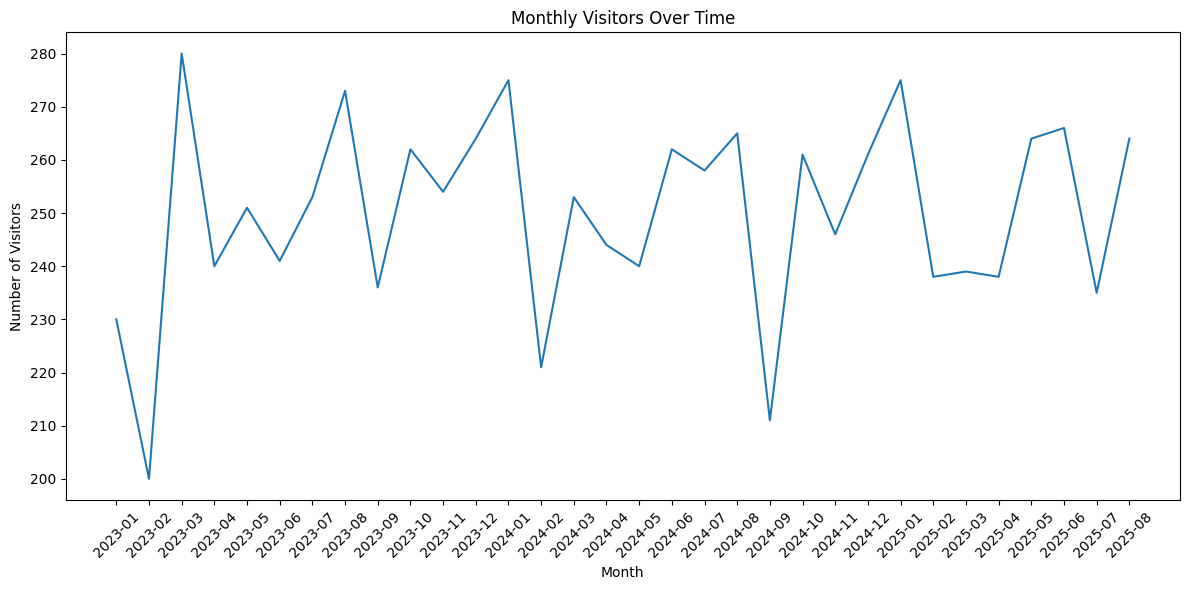

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_visitors['month'], monthly_visitors['visitors'])
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.title('Monthly Visitors Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
import plotly.express as px

df_month = pd.read_sql_query(query, conn)

fig = px.line(monthly_visitors, x='month', y='visitors', title='Monthly Visitors')
fig.show()

In [44]:
top10 = pd.read_sql("""
select diag_desc, COUNT(*) AS count
from visits
group by diag_desc
order by count desc
LIMIT 10
""", conn
)

In [9]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=monthly_visitors)

https://docs.google.com/spreadsheets/d/1oTL6XMC7o-Av3u--WA_fohUkDB8qJ3tGeigNGnK5W5k/edit#gid=0


In [12]:
query = """
select diag_desc, COUNT(*) AS count
from visits
group by diag_desc
order by count desc;
"""
diag_counts = pd.read_sql_query(query, engine)
display(diag_counts)

,diag_desc,count
0,Chronic Kidney Disease,851
1,Eczema,843
2,Type 2 Diabetes,833
3,Asthma,817
4,GERD,804
5,Hypertension,798
6,Depressive Episode,773
7,Back Pain,772
8,Ischemic Heart Disease,760
9,Upper Respiratory Infection,749


In [14]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=diag_counts)

https://docs.google.com/spreadsheets/d/1vAdv67ytxFutIMUGP--2GvPUH20HVUUke-WlDMlM4kc/edit#gid=0


In [16]:
query = """
select dept, AVG(cost) AS avg_cost, SUM(cost) AS total_cost
from visits
group by dept
order by total_cost DESC;
"""
dept_cost = pd.read_sql_query(query, engine)
display(dept_cost)

,dept,avg_cost,total_cost
0,Gastroenterology,24073.770318,27251508
1,Cardiology,28203.762712,26624352
2,Nephrology,26561.945233,13095039
3,Orthopedics,16498.006468,12752959
4,Emergency,11785.354664,10866097
5,General Medicine,5131.638113,8267069
6,Pediatrics,6851.740032,4296041
7,Psychiatry,7658.392079,3867488
8,ENT,7618.049505,3847115
9,Dermatology,6116.766393,2984982


In [18]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=dept_cost)

https://docs.google.com/spreadsheets/d/1VJC7AIhyvlIiF_zKp90xLqS_yT_j4v3FIHfstVwyXS4/edit#gid=0


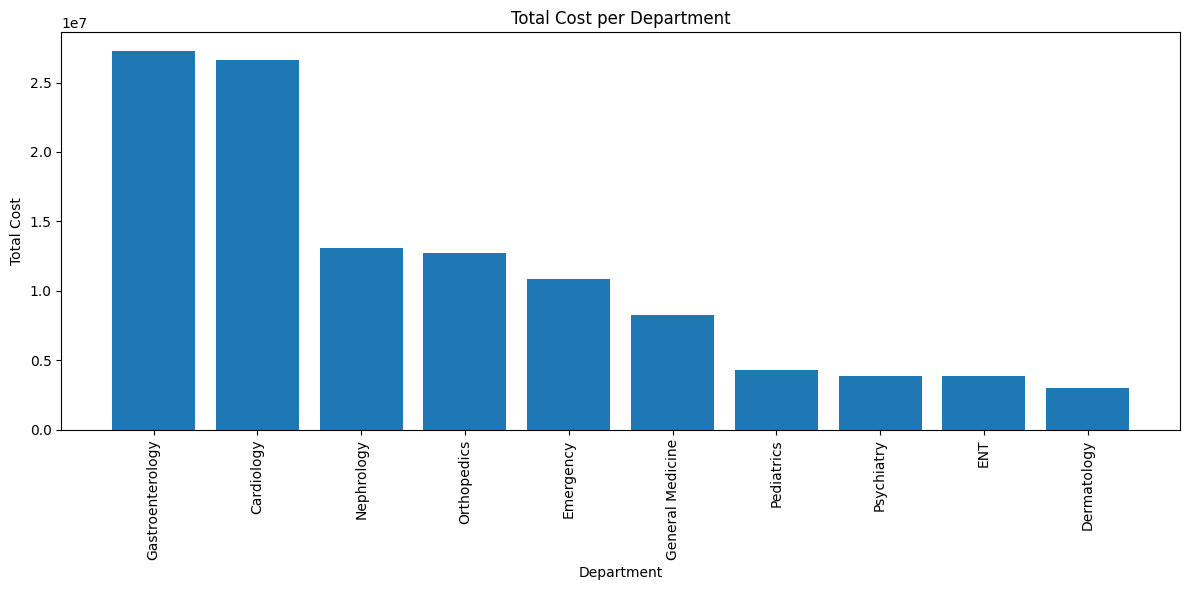

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(dept_cost['dept'], dept_cost['total_cost'])
plt.xlabel('Department')
plt.ylabel('Total Cost')
plt.title('Total Cost per Department')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
query = """
select SUM(readmitted_30d)*1.0/COUNT(*) AS readmission_rate
from visits;
"""
readmission_rate_df = pd.read_sql_query(query, engine)
display(readmission_rate_df)

,readmission_rate
0,0.05025


In [22]:
query = """
WITH age_groups AS (
    select*,
    CASE
        WHEN age < 18 THEN '0-17'
        WHEN age BETWEEN 18 AND 34 THEN '18-24'
        WHEN age BETWEEN 35 AND 50 THEN '35-50'
        WHEN age BETWEEN 51 AND 65 THEN '51-65'
        ELSE '66+'
    END AS age_group
    from visits
)
SELECT age_group, COUNT(*) AS count
FROM age_groups
GROUP BY age_group;
"""
age_group_counts = pd.read_sql_query(query, engine)
display(age_group_counts)

,age_group,count
0,0-17,447
1,18-24,1769
2,35-50,2784
3,51-65,2024
4,66+,976


In [25]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=age_group_counts)

https://docs.google.com/spreadsheets/d/1GMmcGDMRczMdSgzv0vdJ68hmbFS6XelUxzZxKeb0cME/edit#gid=0


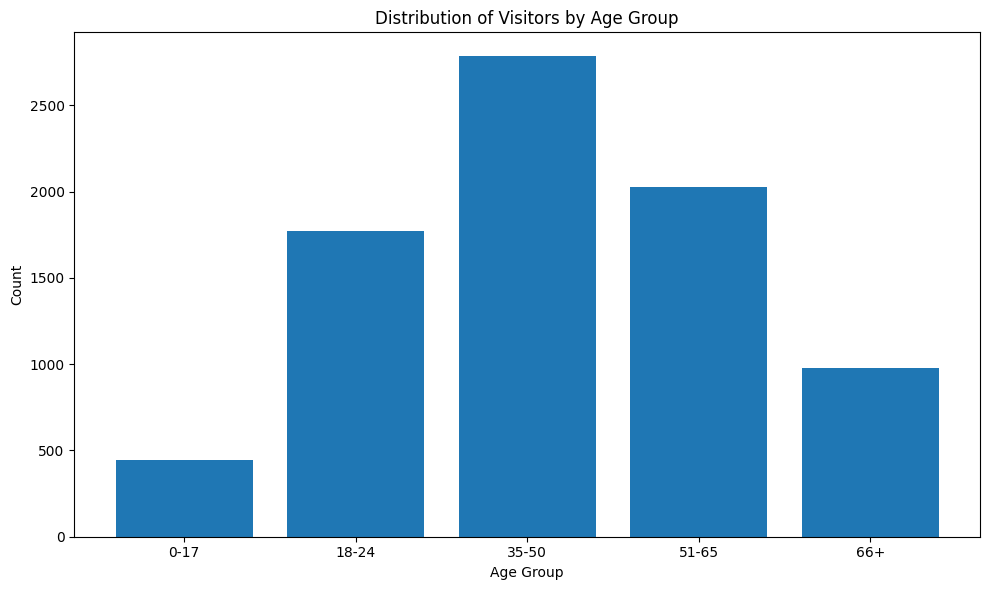

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(age_group_counts['age_group'], age_group_counts['count'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Visitors by Age Group')
plt.tight_layout()
plt.show()

In [27]:
query = """
select patient_id, COUNT(*) AS visits, SUM(cost) AS total_cost
from visits
group by patient_id
order by total_cost Desc
LIMIT 20;
"""
top_patients_by_cost = pd.read_sql_query(query, engine)
display(top_patients_by_cost)

,patient_id,visits,total_cost
0,375,9,254868
1,388,7,248571
2,861,8,206574
3,878,9,205823
4,315,9,200030
5,504,9,198575
6,1801,7,192366
7,1148,13,188979
8,177,9,184688
9,173,10,184559


In [28]:
merged_top_patients = pd.merge(top_patients_by_cost, patients, on='patient_id')
display(merged_top_patients)

,patient_id,visits,total_cost,age,gender,city,insurance
0,375,9,254868,83,Female,Ahmedabad,Private
1,388,7,248571,78,Male,Pune,Government
2,861,8,206574,48,Male,Chennai,Private
3,878,9,205823,49,Female,Kolkata,Private
4,315,9,200030,68,Female,Hyderabad,Private
5,504,9,198575,55,Female,Pune,Self-pay
6,1801,7,192366,79,Female,Ahmedabad,Government
7,1148,13,188979,19,Male,Delhi,Government
8,177,9,184688,45,Male,Hyderabad,Private
9,173,10,184559,43,Female,Kolkata,Private


In [30]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=merged_top_patients)

https://docs.google.com/spreadsheets/d/1uISIoIiRuNYB9ZbnYJi8faCWdLvJG35SmOJbmvr0CBI/edit#gid=0


In [29]:
print("Gender distribution among top patients:")
display(merged_top_patients['gender'].value_counts())

print("\nCity distribution among top patients:")
display(merged_top_patients['city'].value_counts())

print("\nInsurance distribution among top patients:")
display(merged_top_patients['insurance'].value_counts())

Gender distribution among top patients:


,count
gender,
Female,10
Male,10



City distribution among top patients:


,count
city,
Bengaluru,4
Kolkata,3
Ahmedabad,3
Hyderabad,3
Delhi,3
Chennai,2
Pune,2



Insurance distribution among top patients:


,count
insurance,
Private,9
Government,6
Self-pay,5


In [32]:
query = """
select month,
   monthly_cost,
    AVG(monthly_cost) OVER (ORDER BY month ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS rolling_3m_avg
    from (
        select strftime('%Y-%m', visit_date) AS month, SUM(cost) AS monthly_cost
        from visits
        group by month

        order by month
    );
"""
monthly_cost_rolling_avg = pd.read_sql_query(query, engine)
display(monthly_cost_rolling_avg)

,month,monthly_cost,rolling_3m_avg
0,2023-01,3155422,3.155422e+06
1,2023-02,2683041,2.919232e+06
2,2023-03,3849396,3.229286e+06
3,2023-04,3413117,3.315185e+06
4,2023-05,3624581,3.629031e+06
5,2023-06,3272899,3.436866e+06
6,2023-07,3601940,3.499807e+06
7,2023-08,4261953,3.712264e+06
8,2023-09,3881890,3.915261e+06
9,2023-10,3598171,3.914005e+06


In [34]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=monthly_cost_rolling_avg)

https://docs.google.com/spreadsheets/d/1oAZ0StSp9tsupoZIzzMOdkqKyuZZuLztQ0-eK-MSnAM/edit#gid=0


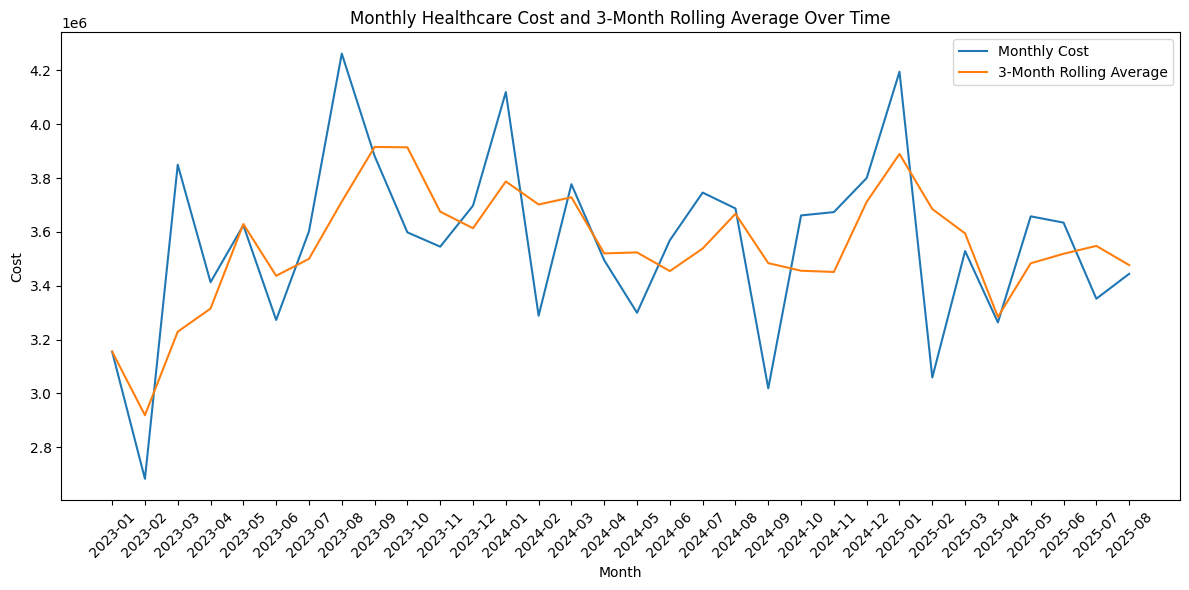

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_cost_rolling_avg['month'], monthly_cost_rolling_avg['monthly_cost'], label='Monthly Cost')
plt.plot(monthly_cost_rolling_avg['month'], monthly_cost_rolling_avg['rolling_3m_avg'], label='3-Month Rolling Average')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.title('Monthly Healthcare Cost and 3-Month Rolling Average Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///healthcare_capstone.db')
query = "SELECT strftime('%Y-%m', visit_date) AS month, COUNT(*) AS visitors FROM visits GROUP BY month ORDER BY month;"
df_month = pd.read_sql_query(query, engine)
df_month.head()


,month,visitors
0,2023-01,230
1,2023-02,200
2,2023-03,280
3,2023-04,240
4,2023-05,251


In [37]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_month)

https://docs.google.com/spreadsheets/d/1eziZyD0NPp7ORbvqnCDFka71pB3ZM5avPHBxgKBVFIo/edit#gid=0


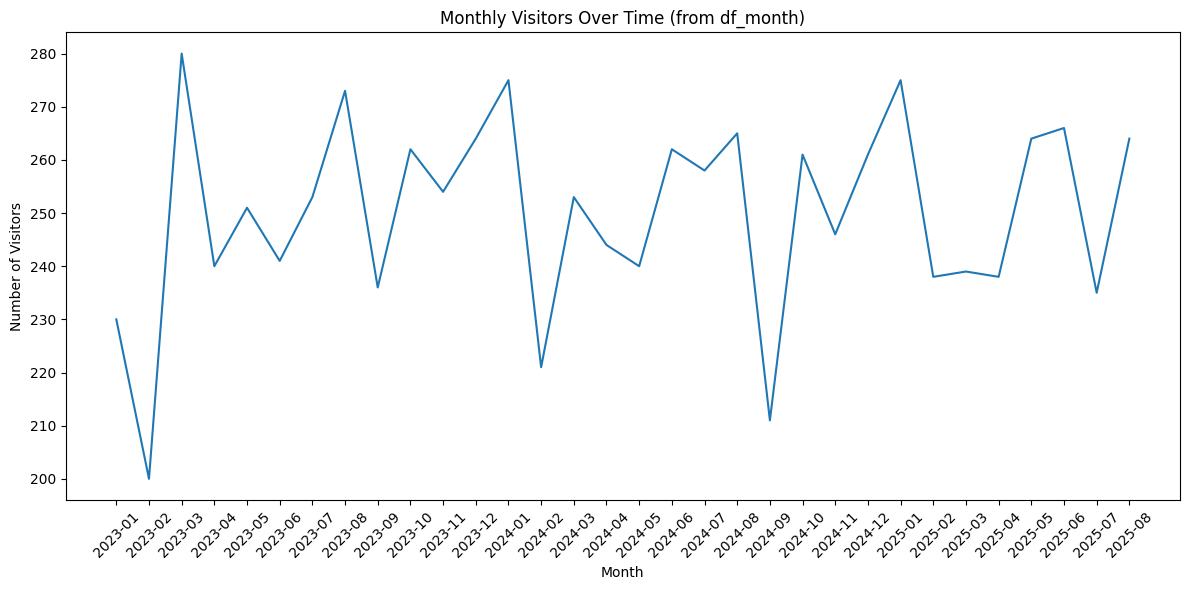

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_month['month'], df_month['visitors'])
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.title('Monthly Visitors Over Time (from df_month)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
df = pd.read_sql_table('visits', engine)
df.info()
df.describe()
df.isnull().mean()  # missing rate by colum
# groupby examples
df.groupby('dept')['cost'].agg(['count','mean','sum']).sort_values('sum', ascending=False)
pd.crosstab(df['dept'], df['outcome'], normalize='index')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   visit_id        8000 non-null   int64  
 1   patient_id      8000 non-null   int64  
 2   visit_date      8000 non-null   object 
 3   age             8000 non-null   int64  
 4   gender          8000 non-null   object 
 5   city            8000 non-null   object 
 6   insurance       8000 non-null   object 
 7   dept            8000 non-null   object 
 8   diag_code       8000 non-null   object 
 9   diag_desc       8000 non-null   object 
 10  procedure       8000 non-null   object 
 11  length_of_stay  8000 non-null   int64  
 12  cost            8000 non-null   int64  
 13  blood_sugar     8000 non-null   float64
 14  creatinine      8000 non-null   float64
 15  readmitted_30d  8000 non-null   int64  
 16  no_show         8000 non-null   int64  
 17  outcome         8000 non-null   o

outcome,Admitted,Deceased,Discharged,Referred
dept,,,,
Cardiology,0.119703,0.006356,0.808263,0.065678
Dermatology,0.122951,0.002049,0.807377,0.067623
ENT,0.104950,0.003960,0.819802,0.071287
Emergency,0.120390,0.004338,0.805857,0.069414
Gastroenterology,0.114841,0.010601,0.801237,0.073322
General Medicine,0.098696,0.011173,0.831782,0.058349
Nephrology,0.131846,0.012170,0.780933,0.075051
Orthopedics,0.113842,0.014230,0.799483,0.072445
Pediatrics,0.122807,0.017544,0.802233,0.057416


In [39]:
import plotly.express as px

fig = px.line(df_month, x='month', y='visitors', title='Monthly Visitors')
fig.show()

In [41]:
top10 = df['diag_desc'].value_counts().nlargest(10).reset_index()
top10.columns = ['diag_desc', 'count']
fig = px.bar(top10, x='diag_desc', y='count', title='Top 10 Diagnoses')
fig.show()

In [54]:
%%writefile app.py
# app.py
import streamlit as st
import pandas as pd
from sqlalchemy import create_engine
import plotly.express as px
from datetime import date

engine = create_engine('sqlite:///healthcare_capstone.db')

st.title("Healthcare Capstone Dashboard")

# filters
with engine.connect() as conn:
  depts = [r[0] for r in conn.execute("SELECT DISTINCT dept FROM visits").fetchall()]
  dept_choice = st.sidebar.multiselect("Department", options=depts, default=depts)
  date_range = st.sidebar.date_input("Date range",[date(2023,1,1), date(2025,8,31)])
  start = date_range[0].isoformat()
  end = date_range[1].isoformat()

  query = f"""
  SELECT strftime('%Y-%m', visit_date) AS month, COUNT(*) AS visitors
  FROM visits
  WHERE dept IN  ({','.join(['?']*len(dept_choice))})
  AND visit_date BETWEEN '{start}' AND '{end}'
  GROUP BY month
  ORDER BY month;
  """
  params = dept_choice
  df_month = pd.read_sql_query(query, engine, params=params)

  fig = px.line(df_month, x='month', y='visitors', title='Monthly Visitors')
  st.plotly_chart(fig,use_container_width=True)

  # show top diagnose table
  diagnosis_q =f"""
  select diag_desc, COUNT(*) AS count
  from visits
  group by diag_desc
  order by count desc
  LIMIT 10
  """
  df_diag = pd.read_sql_query(diagnosis_q, engine)
  st.table(df_diag)

Overwriting app.py


In [45]:
!pip install ipywidgets plotly

In [46]:
from google.colab import output
output.enable_custom_widget_manager()

In [48]:
import ipywidgets as widgets
import plotly.express as px
import pandas as pd

# Departments from SQL
depts = pd.read_sql("SELECT DISTINCT dept FROM visits",conn)["dept"].tolist()
dept_dropdown = widgets.SelectMultiple(
    options=depts,
    value=[depts[0]] if depts else [], # Default to the first department if available
    description='Departments',
    disabled=False
)

def update_plot(dept_choice):
    query = f"""
    SELECT strftime('%Y-%m', visit_date) AS month, COUNT(*) AS visitors
    FROM visits
    WHERE dept IN  ({','.join(['?']*len(dept_choice))})
    GROUP BY month
    ORDER BY month;
    """
    df_month = pd.read_sql_query(query, conn, params=dept_choice)

    fig = px.line(df_month, x='month', y='visitors', title='Monthly Visitors')
    fig.show()

widgets.interact(update_plot, dept_choice=dept_dropdown)

interactive(children=(SelectMultiple(description='Departments', index=(0,), options=('ENT', 'Emergency', 'Orth…

<function __main__.update_plot(dept_choice)>